# About Python, NumPy, and Ipython

Here we will a brief acquaintance with the [Python](https://www.python.org/) programming language, and particular <font color="red">list comprehensions</font>, [NumPy](http://www.numpy.org/) and [MatplotLib](http://matplotlib.org/) from the [scipy](https://scipy.org/) ecosystem, as a language for machine learning. We will be using Python 3 here, which is not compatible with Python 2.x. For an introduction to Python the [Python Tutorial](https://docs.python.org/3.5/tutorial/index.html) is a great place to start; Similarly for [Getting Started](http://scipy.org/getting-started.html) with the Numpy and Matplotlib good places to start are the Numpy [Quickstart tutorial](http://docs.scipy.org/doc/numpy-dev/user/quickstart.html) and the [pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html). If you have earlier experience with MATLAB, then the [Numpy for Matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html) document is a useful reference.

Use [IPython](http://ipython.readthedocs.io/en/stable/) to develop and test your code.



In [2]:
# magic notebook command ensures plot are embedded in the notebook
%matplotlib inline 

# the hello world of python. Notice the : and indentation that define the code 
def helloworld():
    print('hello world!')
    

print('Im not in the function')

helloworld()
# Classes
class HelloWorld():
    
    def __init__(self):
        self.text = 'hello world from HelloWorld Class! - __init__ is my constructor'

    def johnny_be_good(self): # self is the object itself do not forget
        print('Chuck Berry')
c = HelloWorld()
print(c.text)
c.johnny_be_good()

# lets print numbers from 1 -> 5. Notice range goes to 6
for x in range(1, 6):
    print(x)
# odd numbers from 1, 10
odd = list(range(1, 10, 2))
print(odd)
letsmakealist = [1, 2, 3, 4, 5, 6, 7]
print('lets make a list:', letsmakealist)
letsmakeaset = {1, 1, 1, 2, 3, 2, 1, 2, 3, 1, 4, 42}
print('lets make a set:', letsmakeaset)
letsmakeadictionary = {1:2, 2:3, '3':4}
print('lets make a map:', letsmakeadictionary)
# lets compute the square of each odd number with list comprehension
sq = [x**2 for x in odd]
print('square of odd', sq) # pretty cool
# lets make a map from x to x^2 using dictionary comprehension (zip allows to iterate over several iterables at once)
od_sq_dict = {x:y for x, y in zip(odd, sq)}
print('odd to square odd dict:', od_sq_dict)
print('what is the square of 3:', od_sq_dict[3])
print('Lets move on to numpy - the main library used for manipulating vectors and matrices in python')

Im not in the function
hello world!
hello world from HelloWorld Class! - __init__ is my constructor
Chuck Berry
1
2
3
4
5
[1, 3, 5, 7, 9]
lets make a list: [1, 2, 3, 4, 5, 6, 7]
lets make a set: {1, 2, 3, 4, 42}
lets make a map: {1: 2, 2: 3, '3': 4}
square of odd [1, 9, 25, 49, 81]
odd to square odd dict: {1: 1, 3: 9, 5: 25, 7: 49, 9: 81}
what is the square of 3: 9
Lets move on to numpy - the main library used for manipulating vectors and matrices in python


What is X[0,0]: 1.0
First 3 rows and columns of dat:
[[ 1.  1.  1.]
 [ 1.  1. 32.]
 [ 1.  1.  1.]]


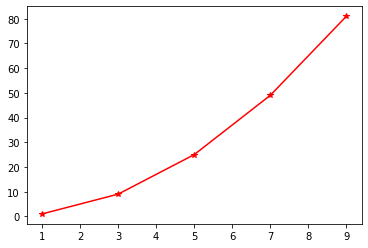

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Numpy is the module we use for working with matrices and vectors eficiently in python 
# There are several ways of creating numpy arrays. Here is a way of making a lot of ones in a matrix.
dat = np.ones((7,3))
dat[1,2] = 32
# NumPy arrays are indexes from 0. X1[0,0] is the first value of the first input point (and should be 1)
print('What is X[0,0]: {0}'.format(dat[0,0]))

# We can also index rows and columns of the NumPy array. For instance the first column is X1[:,0]
# Here : indexes all rows and 0 indexes the first colums. This notation also supports ranges natually.
# As an example lets see the first 3 rows and columns
print("First 3 rows and columns of dat:")
print(dat[0:3,0:3])

## Loading and saving data
# We can load and save NumPy arrays using the commands load and savez
target = -1 * np.ones((7,))
np.savez('myfile.npz', dat=dat, target=target)
myfile = np.load('myfile.npz')
dat = myfile['dat']
target = myfile['target']

## finally plotting lets plot the odd square from above in red with lines connecting and stars as markers
plt.plot(odd, sq, 'r-*')

## Array operations and Boolean arrays (aka filters)
Numpy arrays are very handy for doing arithmetic on vectors and matrices 
and lets you succinctly express the computation you need performed.
Understanding how to use them will make your life a lot easier in this machine learning course.

From Boolean expressions used on NumPy arrays we can compute arrays of Booleans. This is sometimes also called a *filter*. The reason for this is that we can use a Boolean array for indexing another array. We can also extract an array of the true indices of a filter. This can be useful in conjunction with np.random.choice

In [4]:
# simple array
my_array = np.array([1.0, 2.0, 3.0]) # create an array
print('my_array:', my_array) # print it

ex1 = my_array + 2 # vectorized computation - add 2 to all enties
print('my_array + 2:', ex1)
ex2 = my_array *3 + 4 # vectorized computation - multiply each entry by 3 and add 4
print('my_array*3 + 4', ex2)
ex3 = my_array + my_array # add up entries in array entrywise 
print('my_array + my_array', ex3)
ex4 = my_array.min() # arrays support many standard operations, min, max, sum, mean, ....
print('my_array.min()', ex4)
##
# random array of -1,1 values
y = 2*np.random.randint(2, size=10)-1
# construct filter for indices with value 1
pos = (y==1)
# get array of true indices
indices = pos.nonzero()[0]
# the array y
print(y)
# the filter obtained from y
print(pos)
# printed as 0/1 values
print(pos.astype(int))
# the true indices
print(indices)
# selecting a random index
print('Random index of a 1 entry of y:',np.random.choice(indices))

my_array: [1. 2. 3.]
my_array + 2: [3. 4. 5.]
my_array*3 + 4 [ 7. 10. 13.]
my_array + my_array [2. 4. 6.]
my_array.min() 1.0
[ 1  1  1 -1  1 -1  1 -1 -1  1]
[ True  True  True False  True False  True False False  True]
[1 1 1 0 1 0 1 0 0 1]
[0 1 2 4 6 9]
Random index of a 1 entry of y: 2


If we have two filters a and b, we can combine them using Pythons bitwise operators: a&b is the intersection, a|b is the union, and ~a is the complement of a. This is useful when plotting e.g. the data points with label -1 that are classified incorrectly by the hyperplane, or combined with np.random.choise(indices)

## Vectorization (Vector Operations with numpy)

What we mean by vectorization is doing batch processing of data avoiding the explicit use of for loops, and instead making use of internal implementations of array operations of NumPy. This is precisely what we did above for constructing filters. Try to experiment yourself! You can time your code using the timeit function of Python. You should find that the speed increase by vectorization is by orders of magnitude!

In [5]:
import timeit

def vectorized(y):
    pos = (y==1)
    return pos
    
def not_vectorized(y):
    len = y.shape[0]
    pos = np.zeros(len)
    for i in range(len):
        pos = y[i]==1
    return y

y = 2*np.random.randint(2, size=10000)-1

%timeit -n 100 vectorized(y)
%timeit -n 100 not_vectorized(y)

3.83 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.67 ms ± 318 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Notice also the use here of [broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). For instance, in the line defining y, when we multiply the random array with 2, or subtracting 1, in fact the values 2 and 1 are treated as 1 dimensional arrays of size 1, which are then expanded into 1 dimensional arrays of size 10000, where the single entry is duplicated.

## Operations on vectors and matrices as NumPy arrays

In NumPy 1-dimensional arrays naturally models vectors and 2-dimensional arrays naturally models matrices.

In [6]:
a = np.array([1,2,3])     # 3-dimensional vector
b = np.array([[1,2,3]])   # 3-dimensional row vector (1x3 matrix)
c = np.array([[1,2,3]]).T # 3-dimensional column vector (3x1 matrix)
print('a = {}, ndim={}, shape={}'.format(a,a.ndim, a.shape))
print('b = {}, ndim={}, shape={}'.format(b,b.ndim, b.shape))
print('c = \n{}, ndim={}, shape={}'.format(c,c.ndim, c.shape))
A=np.arange(1,10).reshape(3,3)
print('aA =',np.dot(a,A))
print('Aa =',np.dot(A,a))
print('bA =',np.dot(b,A))
print('Ac =',np.dot(A,c))

a = [1 2 3], ndim=1, shape=(3,)
b = [[1 2 3]], ndim=2, shape=(1, 3)
c = 
[[1]
 [2]
 [3]], ndim=2, shape=(3, 1)
aA = [30 36 42]
Aa = [14 32 50]
bA = [[30 36 42]]
Ac = [[14]
 [32]
 [50]]


Notice that when multiplying the vector <tt>a</tt>
with the matrix <tt>A</tt> on the left, <tt>a</tt> behaves as a row vector, and when multiplying on the right <tt>a</tt> behaves as a column vector. The result is always a vector, whereas when multiplying by the corresponding row and column vectors <tt>b</tt> and <tt>c</tt> the result is again a row or column vector (since it is actually a matrix product).

With Python 3.5 and above we may also use the <tt>@</tt> operator, which is a shorthand for the matmul function (which can be used instead of the dot function).

In [7]:
print('aA =',a@A)
print('Aa =',A@a)
print('bA =',b@A)
print('Ac =',A@c)

aA = [30 36 42]
Aa = [14 32 50]
bA = [[30 36 42]]
Ac = [[14]
 [32]
 [50]]


You should mainly use just 1-dimensional arrays for vectors. One can convert between these and row and column vectors as follows:

In [8]:
print('a as a row vector :',np.expand_dims(a,axis=0))
print('a as a column vector :\n',np.expand_dims(a,axis=1))
print('b and c as vectors :', b.squeeze(),c.squeeze())

a as a row vector : [[1 2 3]]
a as a column vector :
 [[1]
 [2]
 [3]]
b and c as vectors : [1 2 3] [1 2 3]


So what are row and column vectors good for? In conjuction with broadcasting! Suppose we have an array of numbers, one for each row of the matrix, and we wish to subtract the given number for a row from each entry of the row. We can do this by just subtracting a column vector.

In [9]:
print(A-a) # subtracting a vector, the vector behaves as a row vector.
print(A-b) # subtracting a row vector.
print(A-c) # subtracting a column vector

[[0 0 0]
 [3 3 3]
 [6 6 6]]
[[0 0 0]
 [3 3 3]
 [6 6 6]]
[[0 1 2]
 [2 3 4]
 [4 5 6]]


Often this happens in the situation where the vector has been computed from the matrix, say with the <tt>mean</tt> operation.
In this case it is convinient to use the <tt>keepdims</tt> parameter. Actually, it can be a good idea to always explicitly use row or column vectors for this purpose to avoid confusion and bugs.

In [10]:
print('The matrix A:\n',A)
print('The means of the rows of A: ',np.mean(A,axis=1))
print('and as a column vector:\n',np.mean(A,axis=1,keepdims=True))
print('Each row translated around the mean:\n',A-np.mean(A,axis=1,keepdims=True))
print('And this is not what we wanted:\n',A-np.mean(A,axis=1))

The matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
The means of the rows of A:  [2. 5. 8.]
and as a column vector:
 [[2.]
 [5.]
 [8.]]
Each row translated around the mean:
 [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
And this is not what we wanted:
 [[-1. -3. -5.]
 [ 2.  0. -2.]
 [ 5.  3.  1.]]
